# Week 6 of Introduction to Biological System Design
## Dynamical System Analysis Tools
### Ayush Pandey

Pre-requisite: To get the best out of this notebook, make sure that you have the basic understanding of ordinary differential equations. For more information on ODEs you may refer to any standard book on engineering math. To learn more about how to numerically simulate ODEs, refer to [week3_intro_ode.ipynb](https://pages.hmc.edu/pandey/reading/week3_intro_ode.ipynb). Further, it is assumed that you have a working knowledge of use of Hill functions to model gene regulation. Computational examples with Hill functions are discussed in [week4_hill_functions.ipynb](https://pages.hmc.edu/pandey/reading/week4_hill_functions.pdf).

This notebook presents biological design choices by use of numerical simulations, mathematical models, and response times of biological systems.

Disclaimer: Content in this notebook is inspired by the fabulous [compuatational notebook](https://colab.research.google.com/github/justinbois/biological-circuit-design-colab/blob/master/chapters/03_small_circuits.ipynb) by Justin Bois and Michael Elowitz on Biological Circuit Design.

# Design Choice - Activator or Repressor

Problem setting: How can we use computational tools to explore the biological design choice of choosing a repressor or an activator to regulate a gene. As an example, we consider the case of regulating a gene by transcription factors in response to environmental signals of different kinds. The first environmental signal that we consider is a toxin signal. A toxin in the cellular environment will trigger an anti-toxin gene expression in the cell. The anti-toxin expression may be activated by inducing a chemical inducer that will bind to the repressor that keeps the anti-toxin gene repressed. An alternative design could be when the presence of toxin in the environment triggers a chemical inducer that activates a transcription factor that recruits RNA polymerase to activate the transcription of the anti-toxin gene. 

On the other hand, a different kind of environmental signal could be a signal such as response to glucose in the environment. This would be a pathway that would be active most of the time as the cell grows since it requires glucose for various metabolic activities. One of the first transcriptional activators discovered in bacteria was the AraC transcription factor. A primary function of the AraC family transcription factors is to regulate sugar catabolism and utilizing the sugar in cells for various metabolic functions. So, on detecting sugar in the environment, a transcription factor (such as AraC) is triggered. Similar to the toxin signal, the mechanism to activate sugar catabolism genes could involve negative induction of a repressor or a positive induction of an activator. 

We will use computational tools at our disposal to create a very simple simulation to explore the design choices.

## Environmental Signals - Toxin and Glucose

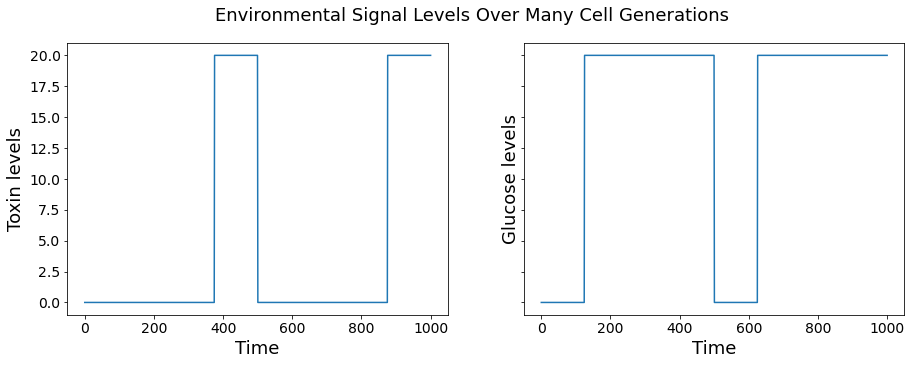

In [144]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
timepoints = np.linspace(0, 1000, 1000, endpoint = True)
max_toxin_value = 20 #arbitrary units
toxin_signal = max_toxin_value*np.ones_like(timepoints) *\
-1*signal.square(2*np.pi*2*timepoints, duty = 0.75)

# Cut off the signal at 0 so that there are no negative values
for i, s in enumerate(toxin_signal):
    if s < 0:
        toxin_signal[i] = 0
        
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)
ax[0].plot(timepoints, toxin_signal)
ax[0].set_xlabel('Time', fontsize = 18)
ax[0].set_ylabel('Toxin levels', fontsize = 18)
ax[0].tick_params(labelsize = 14)


max_glucose_value = 20 #arbitrary units
glucose_signal = max_glucose_value*np.ones_like(timepoints) *\
-1*signal.square(2*np.pi*2*timepoints, duty = 0.25)
for i, s in enumerate(glucose_signal):
    if s < 0:
        glucose_signal[i] = 0
ax[1].plot(timepoints, glucose_signal)
ax[1].set_xlabel('Time', fontsize = 18)
ax[1].set_ylabel('Glucose levels', fontsize = 18)
ax[1].tick_params(labelsize = 14)
fig.suptitle('Environmental Signal Levels Over Many Cell Generations', 
             fontsize = 18);

## Gene Regulation Response (Ideal)

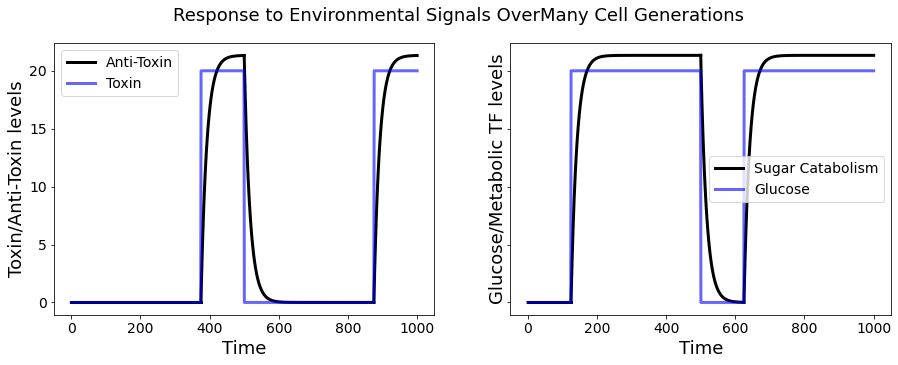

In [145]:
def regulated_gene(x,t,*args):
    k_tx, u, K, n, d_x = args
    return k_tx*(u**n/(K**n + u**n)) - d_x*x

from scipy.integrate import odeint
k_tx = 2
K = 15
d_x = 0.06
n = 2

fig, all_axes = plt.subplots(1,2, figsize = (15,5), sharey = True)
fig.suptitle('Response to Environmental Signals Over' + \
             'Many Cell Generations', fontsize = 18);
ax = all_axes[0]
# For u = 0
previous_time = 0
array_nonzero = np.where(toxin_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_toxin_value
previous_time = next_time
array_zero = np.where(toxin_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(toxin_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)

# For u =/= 0 
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3, label = 'Anti-Toxin')
ax.plot(timepoints, toxin_signal, 'b', lw = 3, 
        alpha = 0.6, label = 'Toxin')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Toxin/Anti-Toxin levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);


ax = all_axes[1]
# For u = 0
previous_time = 0
array_nonzero = np.where(glucose_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_glucose_value
previous_time = next_time
array_zero = np.where(glucose_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(glucose_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3)

# For u =/= 0 
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
ax.plot(t_solve, solution, 'k', lw = 3, 
        label = 'Sugar Catabolism')
ax.plot(timepoints, glucose_signal, 'b', lw = 3, 
        alpha = 0.6, label = 'Glucose')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Glucose/Metabolic TF levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

## Non-specific binding (leaky) expression with activator

When there is no input => activator is not bound and there can be leaky expression. When there is an input, activator is bound so that there is no leaky expression.

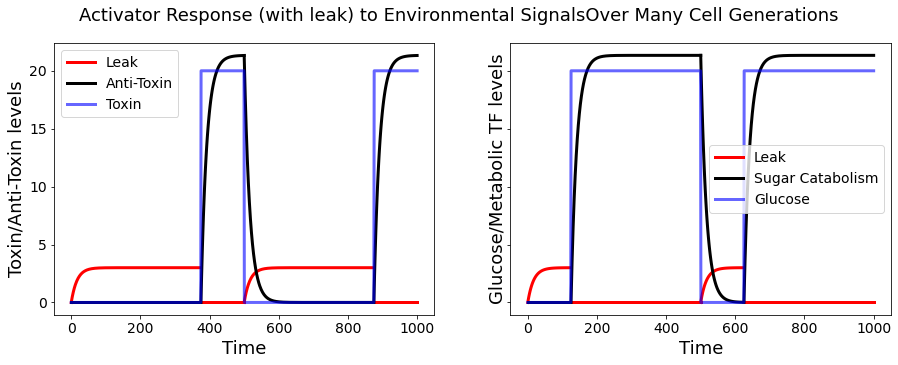

In [149]:
def regulated_gene(x,t,*args):
    k_tx, u, K, n, d_x = args
    return k_tx*(u**n/(K**n + u**n)) - d_x*x
def leaky_expression(x, t, *args):
    alpha, k_tx, d_x = args 
    return k_tx*alpha - d_x*x

from scipy.integrate import odeint
k_tx = 2
K = 15
d_x = 0.06
n = 2
alpha = 0.09

fig, all_axes = plt.subplots(1,2, figsize = (15,5), sharey = True)
fig.suptitle('Activator Response (with leak) to Environmental Signals'+\
             'Over Many Cell Generations', fontsize = 18);
ax = all_axes[0]
# For u = 0
previous_time = 0
array_nonzero = np.where(toxin_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_toxin_value
previous_time = next_time
array_zero = np.where(toxin_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(toxin_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_toxin_value
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3, label = 'Leak')
ax.plot(t_solve, solution, 'k', lw = 3, label = 'Anti-Toxin')
ax.plot(timepoints, toxin_signal, 'b', lw = 3, 
        alpha = 0.6, label = 'Toxin')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Toxin/Anti-Toxin levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);


ax = all_axes[1]

# For u = 0
previous_time = 0
array_nonzero = np.where(glucose_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_glucose_value
previous_time = next_time
array_zero = np.where(glucose_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(glucose_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_glucose_value
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3, label = 'Leak')
ax.plot(t_solve, solution, 'k', lw = 3, 
        label = 'Sugar Catabolism')
ax.plot(timepoints, glucose_signal, 'b', 
        lw = 3, alpha = 0.6, label = 'Glucose')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Glucose/Metabolic TF levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

## Non-specific binding (leaky) expression with repressor

When there is no input => repressor is bound and there is no leak. But when there is an input signal, repressor is unbound and there can be leaky expression as well.

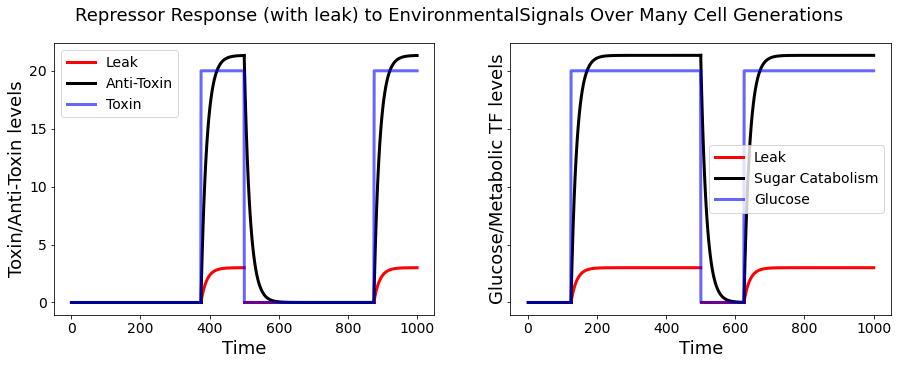

In [152]:
def regulated_gene(x,t,*args):
    k_tx, u, K, n, d_x = args
    return k_tx*(u**n/(K**n + u**n)) - d_x*x
def leaky_expression(x, t, *args):
    alpha, k_tx, d_x = args 
    return k_tx*alpha - d_x*x

from scipy.integrate import odeint
k_tx = 2
K = 15
d_x = 0.06
n = 2
alpha = 0.09

fig, all_axes = plt.subplots(1,2, figsize = (15,5), sharey = True)
fig.suptitle('Repressor Response (with leak) to Environmental'+ \
             'Signals Over Many Cell Generations', fontsize = 18);
ax = all_axes[0]

# For u = 0
previous_time = 0
array_nonzero = np.where(toxin_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_toxin_value
previous_time = next_time
array_zero = np.where(toxin_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(toxin_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_toxin_value
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_toxin_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3, label = 'Leak')
ax.plot(t_solve, solution, 'k', lw = 3, label = 'Anti-Toxin')
ax.plot(timepoints, toxin_signal, 'b', lw = 3, 
        alpha = 0.6, label = 'Toxin')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Toxin/Anti-Toxin levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);


ax = all_axes[1]

# For u = 0
previous_time = 0
array_nonzero = np.where(glucose_signal != 0)[0]
next_time = array_nonzero[0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_glucose_value
previous_time = next_time
array_zero = np.where(glucose_signal == 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time,next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = 0, 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)


# For u = 0 again
previous_time = next_time
array_zero = np.where(glucose_signal != 0)[0]
next_time = array_zero[np.where(array_zero > previous_time)][0]
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, 0, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (0, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3)
ax.plot(t_solve, solution, 'k', lw = 3)

# For u = max_glucose_value
previous_time = next_time
next_time = int(timepoints[-1]) # last point
t_solve = np.linspace(previous_time, next_time, 
                      next_time - previous_time)
solution = odeint(regulated_gene, y0 = solution[-1], 
                  t = t_solve, 
                  args = (k_tx, max_glucose_value, K, n, d_x))
leaky_solution = odeint(leaky_expression, y0 = 0, 
                        t = t_solve, 
                        args = (alpha, k_tx, d_x))
ax.plot(t_solve, leaky_solution, 'r', lw = 3, label = 'Leak')
ax.plot(t_solve, solution, 'k', lw = 3, 
        label = 'Sugar Catabolism')
ax.plot(timepoints, glucose_signal, 'b', lw = 3, alpha = 0.6, 
        label = 'Glucose')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Glucose/Metabolic TF levels', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

Two papers that discuss the mechanisms and detailed models behind this demand theory are: 

1. Shinar et al. 2005 "Rules for biological regulation basedon error minimization". [URL](https://www.pnas.org/content/pnas/103/11/3999.full.pdf) - Uses the non-specific binding theory to prove the evolutionary selections against repressors in high demand genes and selection against activators in low demand genes.

2. Gerland et al. 2008 "Evolutionary selection between alternative mode of gene regulation". [URL](https://www.pnas.org/content/pnas/106/22/8841.full.pdf) - Uses mutation models to show that the population size and time-scales of environmental variations guide the evolutionary selection for repressors and activators in different situations.


# Design Choice - Response Time

Consider the unregulated gene expression model (from [week3_intro_ode.ipynb](https://pages.hmc.edu/pandey/reading/week3_intro_ode.pdf)):

$\frac{dX}{dt} = k - dX$

We derived the analytical solution for this model in Week 3. It is given by:

$X(t) = \frac{k}{d}\left(1 - e^{-d t}\right)$

The steady-state concentration of X is given by $\frac{k}{d}$. Clearly, the response time is only dependent on the degradation parameter $d$. We define the response time as the time that the system takes to reach $1 - \frac{1}{e}$, or approximately 63% of its maximum value. This response time is equal to $t_r = \frac{1}{d}$. The time $t_{1/2}$ is the time the system takes to reach half of the maximum value. We compute these metrics of speed of response using the following code:

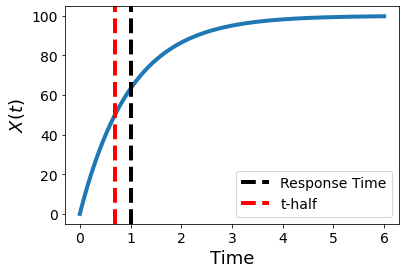

In [153]:
# Parameters
k = 100
d = 1

# Dynamics
timepoints = np.linspace(0, 6, 400)
X = k / d * (1 - np.exp(-d * timepoints))

# Plot response
ax = plt.axes()
ax.plot(timepoints, X, lw=4)

# Mark the response time (when we get to level 1-1/e)
t0 = 1 / d
x0 = k / d * (1 - np.exp(-1))
t_half = np.log(2)/d
ax.axvline(t0, color = 'k', ls = '--', lw = 4, 
           label = 'Response Time')
ax.axvline(t_half, color = 'r', ls = '--', lw = 4, 
           label = 't-half')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('$X(t)$', fontsize = 18)
ax.tick_params(labelsize = 14)
ax.legend(fontsize = 14);

### Note on 2nd order system response

For 2nd order underdamped systems that overshoot the steady-state value, the response time is usually defined using a rise-time metric. Rise time is defined as the time taken to reach 90% of the steady-state value. To measure the error in response, a settling time metric is defined. Settling time is defined as the time the system takes to reach within 2% (or 5%) of the steady-state value.

## Tuning the speed of response

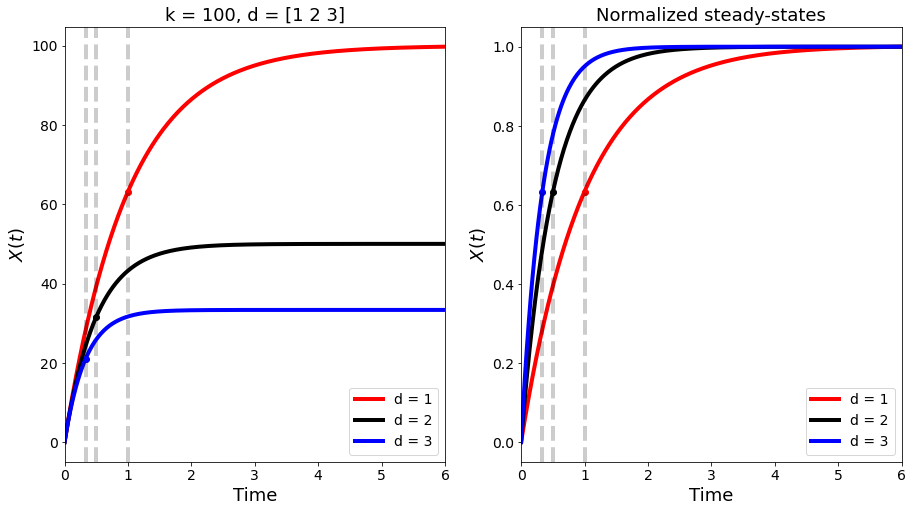

In [160]:
# Parameters
k = 100
d = np.array([1, 2, 3])
colors = ['r','k','b']
# Compute dynamics
timepoints = np.linspace(0, 6, 400)
X = [k / d_i * (1 - np.exp(-d_i * timepoints)) for d_i in d]

fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].set_title('k = '+ str(k) + ', d = ' + str(d), 
                fontsize = 18)
ax[0].set_xlim([0,6])
ax[0].set_xlabel('Time', fontsize = 18)
ax[0].set_ylabel('$X(t)$', fontsize = 18)
ax[0].tick_params(labelsize = 14);
ax[1].set_title('Normalized steady-states', fontsize = 18)
ax[1].set_xlim([0,6])
ax[1].set_xlabel('Time', fontsize = 18)
ax[1].set_ylabel('$X(t)$', fontsize = 18)
ax[1].tick_params(labelsize = 14);
for x_vals, d_i, color in zip(X, d, colors):
    ax[0].plot(timepoints, x_vals, color=color, lw=4, label = 'd = '+str(d_i))
    ax[0].scatter(1 / d_i, k / d_i * (1 - np.exp(-1)), 
                  color=color)
    ax[0].axvline(1 / d_i, color = 'k', ls = '--', lw = 4, 
                  alpha = 0.2)
    ax[0].legend(fontsize = 14);
    ax[1].plot(timepoints, x_vals / np.max(x_vals), 
               color=color, lw=4, label = 'd = ' + str(d_i))
    ax[1].scatter(1 / d_i, 1 - np.exp(-1), 
                  color=color)
    ax[1].axvline(1 / d_i, color = 'k', ls = '--', 
                  lw = 4, alpha = 0.2)
    ax[1].legend(fontsize = 14);

## Negative autoregulation accelerates response times

Consider the negative autoregulation model from [week4_hill_functions.ipynb](https://pages.hmc.edu/pandey/reading/week4_hill_functions.pdf):

$\frac{dX}{dt} = k \frac{K_d}{K_d + X} - dX$

Let us compare the time response of the negative autoregulation to the unregulated gene expression discussed above:

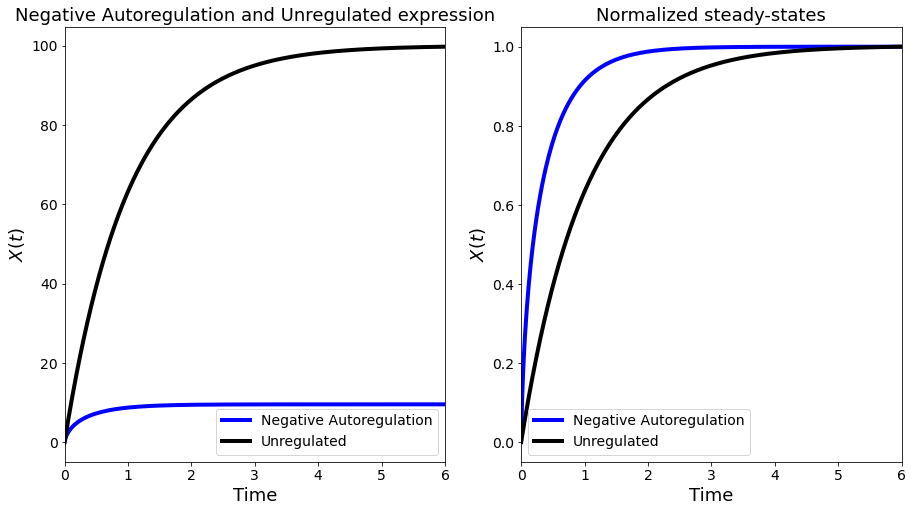

In [156]:
# Negative autoregulation model (from HW 4)
def negative_autoregulation(x, t, *args):
    k, Kd, d = args
    return k * (Kd / (Kd + x)) - d * x

from scipy.integrate import odeint
# Parameters
timepoints = np.linspace(0, 6, 400)
Kd = 1
d = 1
k = 100

# Negative autoregulated solution
X_nar = odeint(negative_autoregulation, y0 = 0, 
                           t = timepoints, args=(k, Kd, d))

# Unregulated solution
unregulated_X = (k/d)*(1 - np.exp(-d * timepoints))

fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].set_title('Negative Autoregulation and Unregulated expression',
                fontsize = 18)
ax[0].set_xlim([0,6])
ax[0].set_xlabel('Time', fontsize = 18)
ax[0].set_ylabel('$X(t)$', fontsize = 18)
ax[0].tick_params(labelsize = 14);
ax[1].set_title('Normalized steady-states', fontsize = 18)
ax[1].set_xlim([0,6])

ax[1].set_xlabel('Time', fontsize = 18)
ax[1].set_ylabel('$X(t)$', fontsize = 18)
ax[1].tick_params(labelsize = 14);

ax[0].plot(timepoints, X_nar[:,0], color='b', lw=4, 
           label = 'Negative Autoregulation')
ax[0].plot(timepoints, unregulated_X, color='k', lw=4, 
           label = 'Unregulated')
ax[0].legend(fontsize = 14)
ax[1].plot(timepoints, X_nar[:,0] / np.max(X_nar[:,0]), 
           color='b', lw=4, label = 'Negative Autoregulation')
ax[1].plot(timepoints, unregulated_X / np.max(unregulated_X), 
           color='k', lw=4, label = 'Unregulated')
ax[1].legend(fontsize = 14);